In [76]:
using NBInclude
using Plots
using LaTeXStrings
using SparseArrays
using DataFrames
using ProgressBars
using Interpolations
using LinearAlgebra
@nbinclude("Hofstadter Single Particle in Julia.ipynb")
@nbinclude(joinpath("..","First Band Approximation Functions.ipynb"))
@nbinclude(joinpath("../Braiding Utils.ipynb"))
@nbinclude("../Aharonov-Bohm Phase.ipynb")
@nbinclude("../Hofstadter Many Body Utils.ipynb");

import
escape /$

In [77]:
Nx=8
Ny=10
N=Nx*Ny
p=1
q=Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi
PN = [0, 1, 2, 3]
U = 4;

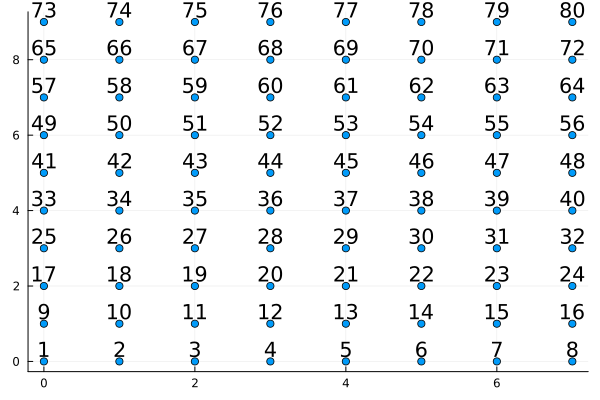

([0 0; 1 0; … ; 6 9; 7 9], nothing)

In [78]:
_, _ = plot_square_lattice(Nx, Ny)

In [86]:
# IMPURITY DATA
V_Strength = 4
V0 = [V_Strength, V_Strength]; Imp_Site = [19, 54]
N_Pin = length(V0[V0 .> 0]) # Number of pinning quasihole

Impurity_Data = Impurity(V0, Imp_Site)
factor = 10 # particle density interpolation factor

# MOVING QUASIHOLES
start_point_1 = Impurity_Data.Imp_Site[1]
lens_1 = [3, 4, 3, 4]
dirs_1 = [1, Nx, -1, -Nx]
rec_path_1 = rectangular_path(start_point_1,lens_1,dirs_1)

start_point_2 = Impurity_Data.Imp_Site[2]
lens_2 = lens_1
dirs_2 = [-1, -Nx, 1, Nx]
rec_path_2 = rectangular_path(start_point_2,lens_2,dirs_2)

# STEP CONTROL
delta_t = 0.01
STEP = 0:delta_t:1
println("Step size for braiding: ",length(STEP))

Step size for braiding: 101


In [87]:
rec_path_1

15-element Vector{Int64}:
 19
 20
 21
 22
 30
 38
 46
 54
 53
 52
 51
 43
 35
 27
 19

In [88]:
rec_path_2

15-element Vector{Int64}:
 54
 53
 52
 51
 43
 35
 27
 19
 20
 21
 22
 30
 38
 46
 54

0.0%┣                                                ┫ 0/8 [00:00<00:00, -0s/it]
75.0%┣███████████████████████████████████▎           ┫ 6/8 [00:00<00:00, 88it/s]
100.0%┣██████████████████████████████████████████████┫ 8/8 [00:00<00:00, 85it/s]
100.0%┣██████████████████████████████████████████████┫ 8/8 [00:00<00:00, 85it/s]
0.0%┣                                               ┫ 0/80 [00:00<00:00, -0s/it]
100.0%┣██████████████████████████████████████████┫ 80/80 [00:00<00:00, 1.5Mit/s]
100.0%┣██████████████████████████████████████████┫ 80/80 [00:00<00:00, 1.1Mit/s]


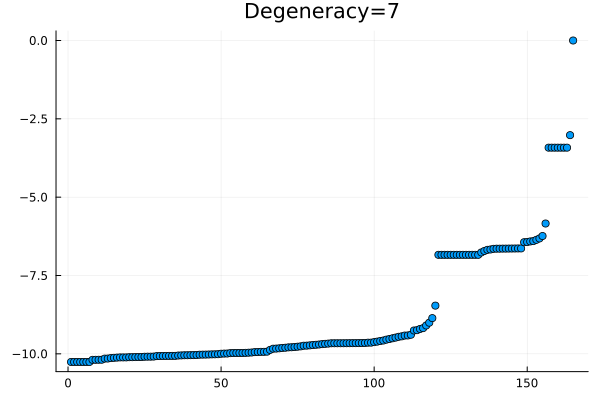

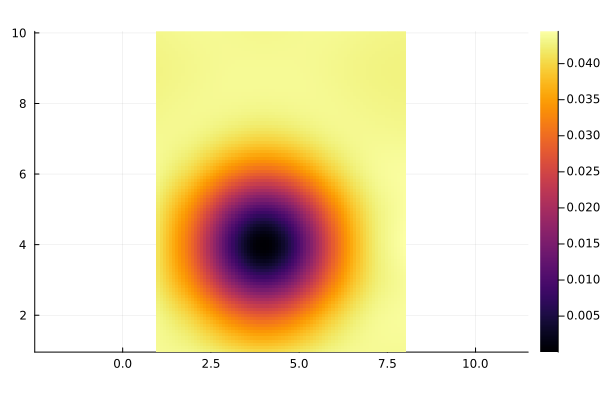

In [62]:
E, Sub_Number_MB_Operator_List, basis_cut_mb, Degeneracy, Total_H, Sub_Number_MB_Operator_List, r_hubbard_states, pn, NPhi0 = Get_MB(N, Nx, Ny, p, q, cut_off, PN, U, Impurity_Data);

In [63]:
# AB PHASE
charge = pn/(NPhi-1)
number_of_plaq = lens_1[1] * lens_1[2]
power = N_Pin * (p/q) * charge * number_of_plaq
AB_phase = exp(2*im*pi*power)

0.4738686624729987 + 0.880595531856738im

In [64]:
power

0.17142857142857143

In [65]:
Eigen_List, BP = optimized_get_braiding_phase(Impurity_Data,rec_path_1,rec_path_2, Imp_Site, Total_H, Sub_Number_MB_Operator_List, Degeneracy);

0.0%┣                                              ┫ 0/808 [00:00<00:00, -0s/it]
41.5%┣█████████████████                        ┫ 335/808 [00:00<00:00, 6.7kit/s]
81.4%┣█████████████████████████████████▍       ┫ 658/808 [00:00<00:00, 6.5kit/s]
100.0%┣████████████████████████████████████████┫ 808/808 [00:00<00:00, 6.5kit/s]
100.0%┣████████████████████████████████████████┫ 808/808 [00:00<00:00, 6.5kit/s]
0.0%┣                                              ┫ 0/808 [00:00<00:00, -0s/it]
4.0%┣█▊                                          ┫ 32/808 [00:00<00:01, 604it/s]
8.2%┣███▋                                        ┫ 66/808 [00:00<00:01, 637it/s]
12.4%┣█████▏                                    ┫ 100/808 [00:00<00:01, 645it/s]
16.6%┣███████                                   ┫ 134/808 [00:00<00:01, 650it/s]
20.8%┣████████▊                                 ┫ 168/808 [00:00<00:01, 653it/s]
25.0%┣██████████▌                               ┫ 202/808 [00:00<00:01, 654it/s]
29.2%┣████████████▎         

In [66]:
BP

7-element Vector{Float64}:
 -0.5078868425214134
 -0.4801460625735242
 -0.4445626512019848
 -0.4224150134255696
 -0.40949799965190087
 -0.0869563927018046
 -0.05079895337963684

In [67]:
sum(BP)

-2.4022639154558343

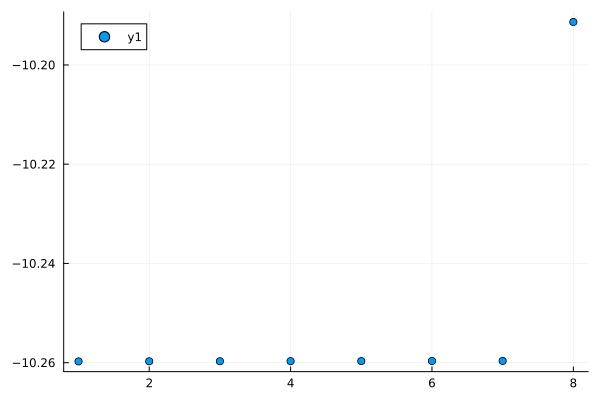

In [68]:
scatter(E[1:8])

In [69]:
length(Eigen_List)

808

In [58]:
# @gif for i in 600:1010
#     data = Get_Avg_Density(Nx, Ny, Degeneracy, N, Sub_Number_MB_Operator_List, basis_cut_mb, Eigen_List[i])'
#     heatmap(Interp(data, factor), aspect_ratio=:equal)
# end